In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [50]:
import pandas as pd
df = pd.read_csv('output.csv')


In [51]:
df.head(10)

,Programmer,Page,Android,IOS,Windows,Linux,WEB,Mac,Beginner,Middle,Prof,Business,Purchase,LocalData,RemoteData,Designer,TotalPrice,Time
0,9,11,0,0,1,0,0,0,0,0,1,0,1,0,1,1,16976,33
1,7,41,0,0,0,1,0,0,0,0,0,1,0,0,0,1,29281,58
2,1,36,1,1,1,1,0,0,1,0,0,0,0,1,1,1,12734,25
3,10,39,1,0,0,0,1,0,0,1,0,0,1,1,0,0,29003,58
4,5,49,1,0,1,0,0,0,0,0,0,1,1,1,1,0,28300,56
5,8,15,1,0,1,1,0,0,0,1,0,0,1,0,0,0,18066,36
6,7,11,1,1,0,1,0,1,1,0,0,0,0,1,0,1,15365,30
7,4,42,1,1,0,0,0,0,0,0,1,0,0,1,1,0,22970,45
8,10,44,0,1,0,1,1,0,0,0,1,0,0,0,0,0,27643,55
9,7,33,0,0,1,0,0,1,0,0,0,1,1,1,0,1,23102,46


In [52]:
copyDataSet = df.copy()

In [53]:
copyDataSet.isna().sum() 

Programmer    0
Page          0
Android       0
IOS           0
Windows       0
Linux         0
WEB           0
Mac           0
Beginner      0
Middle        0
Prof          0
Business      0
Purchase      0
LocalData     0
RemoteData    0
Designer      0
TotalPrice    0
Time          0
dtype: int64

In [54]:
copyDataSet.dtypes

Programmer    int64
Page          int64
Android       int64
IOS           int64
Windows       int64
Linux         int64
WEB           int64
Mac           int64
Beginner      int64
Middle        int64
Prof          int64
Business      int64
Purchase      int64
LocalData     int64
RemoteData    int64
Designer      int64
TotalPrice    int64
Time          int64
dtype: object

In [55]:
copyDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Programmer  1000 non-null   int64
 1   Page        1000 non-null   int64
 2   Android     1000 non-null   int64
 3   IOS         1000 non-null   int64
 4   Windows     1000 non-null   int64
 5   Linux       1000 non-null   int64
 6   WEB         1000 non-null   int64
 7   Mac         1000 non-null   int64
 8   Beginner    1000 non-null   int64
 9   Middle      1000 non-null   int64
 10  Prof        1000 non-null   int64
 11  Business    1000 non-null   int64
 12  Purchase    1000 non-null   int64
 13  LocalData   1000 non-null   int64
 14  RemoteData  1000 non-null   int64
 15  Designer    1000 non-null   int64
 16  TotalPrice  1000 non-null   int64
 17  Time        1000 non-null   int64
dtypes: int64(18)
memory usage: 140.8 KB


In [56]:
copyDataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
Programmer,1000.0,5.491,2.950021,1.0,3.0,5.5,8.00,10.0
Page,1000.0,25.474,14.453589,1.0,13.0,26.0,38.00,50.0
Android,1000.0,0.515,0.500025,0.0,0.0,1.0,1.00,1.0
IOS,1000.0,0.502,0.500246,0.0,0.0,1.0,1.00,1.0
Windows,1000.0,0.510,0.500150,0.0,0.0,1.0,1.00,1.0
Linux,1000.0,0.530,0.499349,0.0,0.0,1.0,1.00,1.0
WEB,1000.0,0.476,0.499674,0.0,0.0,0.0,1.00,1.0
Mac,1000.0,0.488,0.500106,0.0,0.0,0.0,1.00,1.0
Beginner,1000.0,0.278,0.448238,0.0,0.0,0.0,1.00,1.0
Middle,1000.0,0.230,0.421043,0.0,0.0,0.0,0.00,1.0


In [57]:
for col in copyDataSet.columns:
    print(col,copyDataSet[col].unique())

Programmer [ 9  7  1 10  5  8  4  6  2  3]
Page [11 41 36 39 49 15 42 44 33 23 50 18 38 35 27 34 28 21  2 10 40  4 20 19
 46 32 30  9  7 26 47 17 24 16  8 29 37 48  3 22 31 14 13  1  6 43  5 12
 45 25]
Android [0 1]
IOS [0 1]
Windows [1 0]
Linux [0 1]
WEB [0 1]
Mac [0 1]
Beginner [0 1]
Middle [0 1]
Prof [1 0]
Business [0 1]
Purchase [1 0]
LocalData [0 1]
RemoteData [1 0]
Designer [1 0]
TotalPrice [16976 29281 12734 29003 28300 18066 15365 22970 27643 23102 17283 35059
 27000 14676 20392 21508 36223 17794 23374 21420 20002 23520 25632 21330
 11466 18410  7498 33310 12268 17666  5997 26527 13318 24522 12059 18185
 17312 16332  9337 13835 18783 13208 32009  9297 33956 13171  8283 12552
 20886 10113 20164 16895 16310 20551 14870 19923 25560 10602 14441 10850
 19032 19666 23174 21440 26405 17890 15173 12524 14478 19723  9733 17321
 20304 25366 17620 17433 13298 18697 23611 22587 20273 21070 20600 16083
 27063 21869 11773 13424 29039 23781 19914 20231 19601 17034 19382 14459
 15523 21652 123

In [58]:
x = copyDataSet.iloc[:,:-2]
x

,Programmer,Page,Android,IOS,Windows,Linux,WEB,Mac,Beginner,Middle,Prof,Business,Purchase,LocalData,RemoteData,Designer
0,9,11,0,0,1,0,0,0,0,0,1,0,1,0,1,1
1,7,41,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,1,36,1,1,1,1,0,0,1,0,0,0,0,1,1,1
3,10,39,1,0,0,0,1,0,0,1,0,0,1,1,0,0
4,5,49,1,0,1,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9,2,0,1,0,1,0,0,0,1,0,0,1,1,0,0
996,8,24,1,0,1,1,0,0,1,0,0,0,0,1,1,0
997,6,8,1,1,1,0,0,0,0,0,1,0,0,0,0,0
998,2,10,1,0,1,1,1,0,0,0,1,0,0,1,1,0


In [59]:
y = copyDataSet.iloc[:,-2:]
y

,TotalPrice,Time
0,16976,33
1,29281,58
2,12734,25
3,29003,58
4,28300,56
...,...,...
995,12530,25
996,24611,49
997,12122,24
998,7580,15


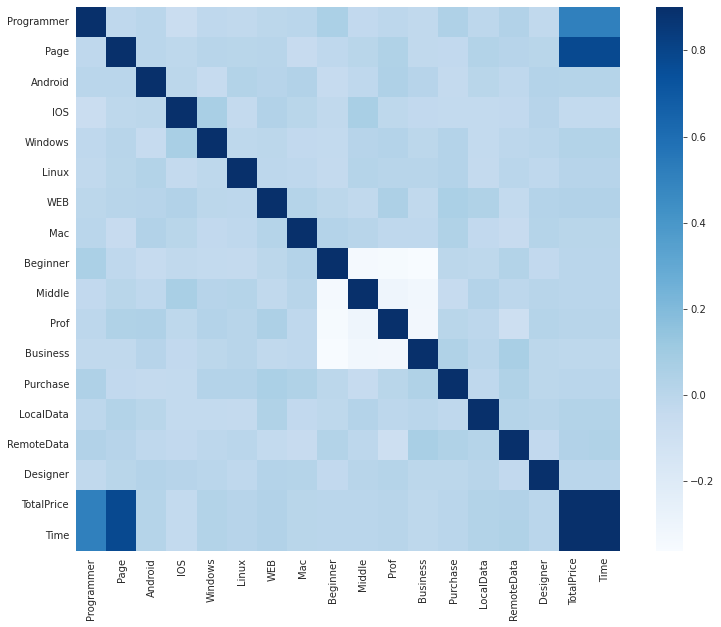

In [60]:
# Heatmaps can be used to visualize data in a colored matrix

corr = copyDataSet.corr()
plt.subplots(figsize=(13,10))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

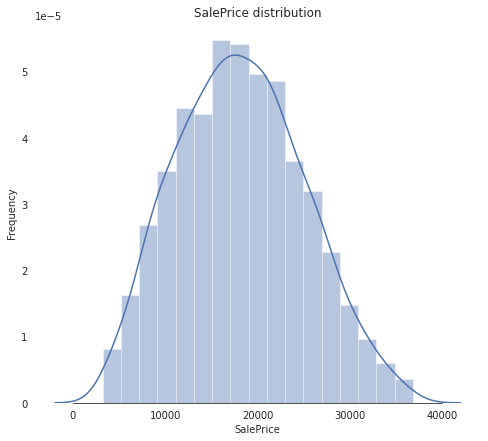

In [61]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(copyDataSet['TotalPrice'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

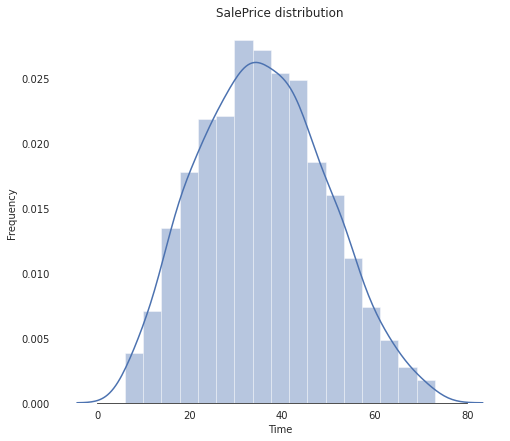

In [62]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(copyDataSet['Time'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Time")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [63]:
# sns.pairplot(x)

In [64]:
# from sklearn.preprocessing import StandardScaler

# numeric = x.dtypes[x.dtypes != "object"].index

# scaler = StandardScaler()
# scaler.fit(x[numeric].values)
# x[numeric] = scaler.transform(x[numeric].values)

# x[numeric] = x[numeric].fillna(0)
# x = x.to_numpy()

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [68]:
x_train,x_test

(     Programmer  Page  Android  IOS  Windows  Linux  WEB  Mac  Beginner  \
 873           3    42        1    0        0      1    1    0         0   
 564           3     9        1    1        0      0    1    0         0   
 498           8    49        0    1        1      1    1    0         0   
 179          10    33        1    0        1      1    1    1         0   
 482           4    46        0    1        0      1    0    0         0   
 ..          ...   ...      ...  ...      ...    ...  ...  ...       ...   
 542           4     2        1    0        1      1    1    0         0   
 676           3     4        0    1        0      0    0    1         1   
 353           8    31        0    1        1      0    0    0         1   
 449           4    45        1    1        1      1    0    1         0   
 175           4    14        1    1        0      0    0    0         0   
 
      Middle  Prof  Business  Purchase  LocalData  RemoteData  Designer  
 873       0

In [69]:
import tensorflow as tf

model = tf.keras.Sequential([
  
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(64),
  tf.keras.layers.Dense(128),
  tf.keras.layers.Dense(2),
  
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train,y_train, epochs=500)

# Make predictions with the trained model


Epoch 1/500
25/25 [==============================] - 0s 2ms/step - loss: 188841904.0000
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 178466032.0000
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 141027888.0000
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 62866524.0000
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 12896489.0000
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 9751837.0000
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 8874555.0000
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 8333495.0000
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 7847821.0000
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 7325762.5000
Epoch 11/500
25/25 [==============================] - 0s 2ms/step - loss: 6881590.0000
Epoch 12/500
25/25 [========================

In [73]:
x_train

,Programmer,Page,Android,IOS,Windows,Linux,WEB,Mac,Beginner,Middle,Prof,Business,Purchase,LocalData,RemoteData,Designer
873,3,42,1,0,0,1,1,0,0,0,1,0,1,1,0,1
564,3,9,1,1,0,0,1,0,0,0,1,0,0,1,0,1
498,8,49,0,1,1,1,1,0,0,1,0,0,0,0,1,0
179,10,33,1,0,1,1,1,1,0,0,1,0,1,0,0,0
482,4,46,0,1,0,1,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,4,2,1,0,1,1,1,0,0,1,0,0,0,0,0,0
676,3,4,0,1,0,0,0,1,1,0,0,0,1,0,1,0
353,8,31,0,1,1,0,0,0,1,0,0,0,1,0,1,1
449,4,45,1,1,1,1,0,1,0,0,1,0,1,0,0,1


Text(0.5, 1.0, 'Training loss')

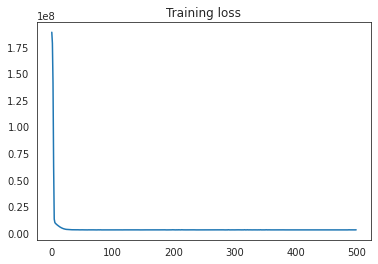

In [70]:
loss = history.history['loss']

# Grafik oluşturun
plt.plot(loss)
plt.title('Training loss')

In [78]:
x_test.iloc[0]

Programmer    10
Page          48
Android        1
IOS            0
Windows        0
Linux          1
WEB            1
Mac            1
Beginner       0
Middle         0
Prof           0
Business       1
Purchase       1
LocalData      1
RemoteData     1
Designer       0
Name: 405, dtype: int64

In [83]:
y_test.iloc[1]

TotalPrice    24707
Time             49
Name: 105, dtype: int64

In [101]:
y_preds = model.predict(x_test)
y_preds

7/7 [==============================] - 0s 2ms/step


array([[3.24960879e+04, 7.20688477e+01],
       [2.14799355e+04, 4.82404175e+01],
       [9.77147559e+03, 2.09313221e+01],
       [1.69919004e+04, 3.68059692e+01],
       [1.93857969e+04, 4.30243835e+01],
       [1.26479785e+04, 2.80778065e+01],
       [2.53862090e+04, 5.67563477e+01],
       [1.11953018e+04, 2.43381824e+01],
       [2.35160566e+04, 5.19382629e+01],
       [1.60465205e+04, 3.59160461e+01],
       [1.23021211e+04, 2.69600086e+01],
       [1.83749453e+04, 3.98504944e+01],
       [1.28103799e+04, 2.78901691e+01],
       [2.12710137e+04, 4.75260620e+01],
       [3.17826855e+04, 7.04319153e+01],
       [2.51237793e+04, 5.52556763e+01],
       [1.86536699e+04, 4.14966736e+01],
       [2.30323398e+04, 5.15748291e+01],
       [2.25890879e+04, 4.95758972e+01],
       [1.40344404e+04, 3.00167866e+01],
       [9.71795801e+03, 2.08386707e+01],
       [2.17625879e+04, 4.77908020e+01],
       [1.21426162e+04, 2.59577045e+01],
       [2.49895332e+04, 5.57061768e+01],
       [2.271817

In [84]:
g=model.layers[0].get_config()
g

{'name': 'dense_2',
 'trainable': True,
 'dtype': 'float32',
 'units': 32,
 'activation': 'linear',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

ValueError: ignored

In [85]:
weights, biases = model.layers[0].get_weights()
print("weights = ",weights),print("bias = ",biases),print(weights.shape," - ",biases.shape)

weights =  [[-5.67768216e-01  3.13121714e-02 -4.25878584e-01 -6.31814659e-01
   3.87999952e-01  2.56713122e-01  1.58979610e-01 -5.29146135e-01
  -5.84333539e-02 -4.40771401e-01  8.14827800e-01  8.13430250e-01
  -9.34172049e-02  8.08278263e-01  1.72862485e-01  7.15487659e-01
   1.11310430e-01 -5.75105131e-01 -5.58741808e-01 -2.25840092e-01
   4.18009222e-01 -8.06936741e-01 -4.89647478e-01  5.31746686e-01
  -1.48534060e-01  5.23554444e-01  8.14513862e-01  7.54189014e-01
   8.50376427e-01 -6.11112773e-01  9.71754014e-01 -7.56121635e-01]
 [-3.13126326e-01  3.01872015e-01 -2.77934432e-01 -3.27243447e-01
   3.82975191e-01  2.00033501e-01  2.16437325e-01 -5.35189994e-02
  -3.87879461e-01 -7.15367272e-02  8.39426666e-02  4.59232442e-02
  -2.65602976e-01 -4.90244776e-02  1.05613038e-01  1.85469225e-01
   1.59407169e-01  1.04405582e-02 -6.56769723e-02 -2.92246252e-01
   3.06279033e-01 -2.15588748e-01 -3.32081825e-01  3.05849284e-01
  -2.64151931e-01  1.93043932e-01  1.75234571e-01  4.05580819e-0

(None, None, None)

In [29]:
weights1, biases1 = model.layers[1].get_weights()
weights1,biases1

(array([[15.468018  ,  0.7791119 ],
        [14.964315  ,  0.38828394]], dtype=float32),
 array([12.452796, 10.877948], dtype=float32))

In [30]:
import numpy as np

In [31]:
def modelR(weights, biases, data):
   # This is the input layer.
   y = np.matmul(data,weights[0])+biases[0][None,:] 
   y_act = tf.keras.relu(y) #also dropout or any other function you use here
   z = np.matmul(y_act,weights[1])+biases[1][None,:]
   z_act = tf.keras.relu(z) #also dropout and any other function you use here 
   return z_act

In [32]:
weights, biases = model.layers[0].get_weights()
print("weights = ",weights),print("bias = ",biases),print(weights.shape," - ",biases.shape)

weights =  [[10.365515   10.734627  ]
 [12.52908    12.403305  ]
 [ 1.1528507   0.496079  ]
 [-0.49267945 -0.39145553]
 [ 2.2410908   2.158513  ]
 [-1.2538209  -1.8743156 ]
 [ 2.3069444   1.6703864 ]
 [ 2.1935265   1.3954498 ]
 [ 0.06528763  0.08813677]
 [ 0.6320461   0.4406253 ]
 [-0.266595   -1.0681103 ]
 [ 0.15227164 -0.31795788]
 [ 0.45526993  0.94304997]
 [ 1.025332    2.0597205 ]
 [ 0.6660204   0.8957983 ]
 [ 0.04261746 -0.7442057 ]]
bias =  [14.520242 14.850952]
(16, 2)  -  (2,)


(None, None, None)

In [33]:
weights1, biases1 = model.layers[1].get_weights()
weights1,biases1

(array([[15.468018  ,  0.7791119 ],
        [14.964315  ,  0.38828394]], dtype=float32),
 array([12.452796, 10.877948], dtype=float32))

In [90]:
weights, biases = model.layers[0].get_weights()
weights1, biases1 = model.layers[1].get_weights()
weights2, biases2 = model.layers[2].get_weights()
weights3, biases3 = model.layers[3].get_weights()


In [ ]:
x_test

In [99]:
def predict(x,weights,weights1,weights2,weights3,biases,biases1,biases2,biases3):
  # Girdi verisiyle ağırlıkları çarpın
  print("x = ",x)
  y = tf.matmul(x, weights)
  print("y1 = ",y)
  y = y + biases

  print("y = ",y)

  z = tf.matmul(y, weights1)
  z = z + biases1

  c = tf.matmul(z, weights2)
  c = c + biases2

  d = tf.matmul(c, weights3)
  d = d + biases3


  
  return d

In [ ]:
print(predict(x_test,weights,weights1,weights2,weights3,biases,biases1,biases2,biases3))

In [106]:
# Get the weights and biases of the hidden layers
hidden_layers = model.layers[:]  # Get all the layers except the input and output layers
weights = [layer.get_weights()[0] for layer in hidden_layers]
biases = [layer.get_weights()[1] for layer in hidden_layers]


In [117]:
np.array(biases).shape,np.array(weights).shape

((4,), (4,))

In [136]:
weights[1]

(32, 64)

In [138]:
np.set_printoptions(threshold=np.inf)

In [143]:
weights[3]

array([[ 0.29809636,  0.11849909],
       [-0.3088185 ,  0.13531375],
       [ 0.19380443,  0.14843784],
       [-0.27838305,  0.08913955],
       [ 0.3462695 , -0.1593564 ],
       [ 0.2569519 , -0.03833443],
       [-0.30787414, -0.18311219],
       [ 0.30293968, -0.04554391],
       [-0.26713324, -0.18092865],
       [ 0.32059774,  0.06591868],
       [ 0.21642132, -0.10463877],
       [ 0.28197616, -0.10938425],
       [-0.13992664,  0.0408981 ],
       [-0.19216077, -0.16029082],
       [-0.2306852 , -0.03131077],
       [ 0.18428686,  0.15119576],
       [ 0.21255536, -0.12708774],
       [-0.1573109 ,  0.12720701],
       [ 0.2500632 ,  0.1501446 ],
       [ 0.26467776,  0.08405419],
       [-0.31080192, -0.0149403 ],
       [ 0.24087311, -0.05412753],
       [-0.3281497 , -0.01770767],
       [ 0.23388983, -0.06032589],
       [ 0.3199552 , -0.09641745],
       [ 0.24207301,  0.13494818],
       [ 0.2910948 ,  0.04451614],
       [ 0.34766704,  0.09941915],
       [ 0.18789989,

In [123]:
weights

[array([[-5.67768216e-01,  3.13121714e-02, -4.25878584e-01,
         -6.31814659e-01,  3.87999952e-01,  2.56713122e-01,
          1.58979610e-01, -5.29146135e-01, -5.84333539e-02,
         -4.40771401e-01,  8.14827800e-01,  8.13430250e-01,
         -9.34172049e-02,  8.08278263e-01,  1.72862485e-01,
          7.15487659e-01,  1.11310430e-01, -5.75105131e-01,
         -5.58741808e-01, -2.25840092e-01,  4.18009222e-01,
         -8.06936741e-01, -4.89647478e-01,  5.31746686e-01,
         -1.48534060e-01,  5.23554444e-01,  8.14513862e-01,
          7.54189014e-01,  8.50376427e-01, -6.11112773e-01,
          9.71754014e-01, -7.56121635e-01],
        [-3.13126326e-01,  3.01872015e-01, -2.77934432e-01,
         -3.27243447e-01,  3.82975191e-01,  2.00033501e-01,
          2.16437325e-01, -5.35189994e-02, -3.87879461e-01,
         -7.15367272e-02,  8.39426666e-02,  4.59232442e-02,
         -2.65602976e-01, -4.90244776e-02,  1.05613038e-01,
          1.85469225e-01,  1.59407169e-01,  1.04405582e-

In [107]:
import numpy as np

def predict(inputs, weights, biases):
  # Perform matrix multiplication using the weights and biases of the hidden layers
  for i, (weight, bias) in enumerate(zip(weights, biases)):
    inputs = np.matmul(inputs, weight) + bias
  return inputs


In [109]:
# Make a prediction
print(predict(x_test, weights, biases))


                0          1
405  32496.088765  72.068972
105  21479.937633  48.240431
804   9771.475753  20.931302
336  16991.900397  36.806000
644  19385.795225  43.024410
..            ...        ...
625  23431.893214  52.595022
657  10702.998177  23.454565
618  14072.563272  31.303837
230  26076.671869  57.647023
204  21629.883905  47.911995

[200 rows x 2 columns]


In [35]:
x_train.shape,y_train.shape

((800, 16), (800, 2))

In [42]:
y_train["Total Price"],y_preds[:,0],x_train["Programmer Price"]

IndexError: ignored

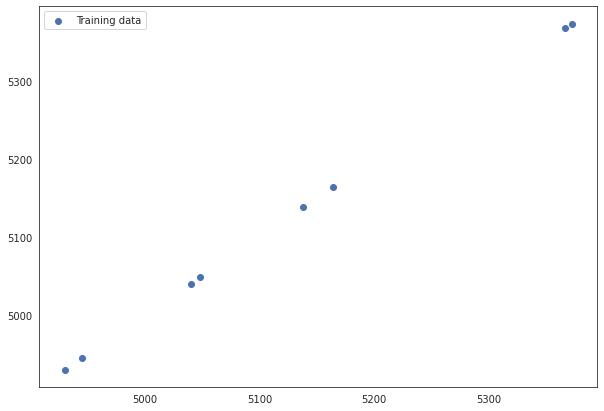

In [39]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(y_train["Total Price"],y_train["Total Price"], c='b', label='Training data')
# Plot test data in green
# plt.scatter(x_train["Programmer Price"],["Programmer Price"], c='g', label='Testing data')
# Show the legend
plt.legend();

In [ ]:
x_test.shape,weights.shape,x_test.ndim,weights.ndim

In [ ]:
print(predict(x_test,weights,weights1,biases,biases1))

In [ ]:
model.predict(x_test)

In [ ]:
x_test[0]

In [ ]:
weights[0].shape,x_test[0].shape,biases.shape

In [ ]:
y_preds = model.predict(tf.expand_dims(x_test[0], axis=0))
y_preds

In [ ]:
toplam = 0

for i in range(16):
  toplam = toplam + (weights[i][0] * x_test[0][i])



print("toplam = ",toplam + biases[0])



In [ ]:
def calculate(weighst,data,bias):
  toplam = 0

  for i in range(16):
    toplam = toplam + (weights[i][0] * x_test[0][i])

  print("toplam = ",toplam + biases[0])

In [ ]:
biases = tf.expand_dims(biases, axis=-1)

In [ ]:
matrixim = tf.linalg.matmul(weights,biases)
matrixim

In [ ]:
copyDataSet.iloc[0,:]

In [ ]:
x_test[0]

In [ ]:
# deneme = matrixim * copyDataSet.iloc[0,:]
deneme = matrixim * x_test[0]

In [ ]:
toplam = 0;
count = 0

for i in deneme:
  toplam = toplam + i[count];
  count = count + 1
  if count == 16:
    break

print("toplam = ",toplam)

In [ ]:
x_test

In [ ]:
def customPredict(x):
  return x * weights + biases

In [ ]:
x_test.shape

In [ ]:
import numpy as np

In [ ]:
def modelR(weights, biases, data):
   # This is the input layer.
   y = np.matmul(data,weights[0])+biases[0][None,:] 
   y_act = tf.keras.relu(y) #also dropout or any other function you use here
  #  z = np.matmul(y_act,weights[1])+biases[1][None,:]
  #  z_act = tf.keras.relu(z) #also dropout and any other function you use here
  #  p = np.matmul(z_act,weights[2])+biases[2][None,:]
   p_act =tf.keras.sigmoid(y_act)   
   return p_act

In [ ]:
modelR(weights,biases,model)

In [ ]:
gelen = customPredict(x_test)
print(gelen)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((8, 18), (8, 2), (2, 18), (2, 2))

In [ ]:
y_train.iloc[:,0]

2    5217
5    4945
7    5373
8    5164
6    5367
9    5095
0    5040
4    5048
Name: Total Price, dtype: int64

ValueError: ignored

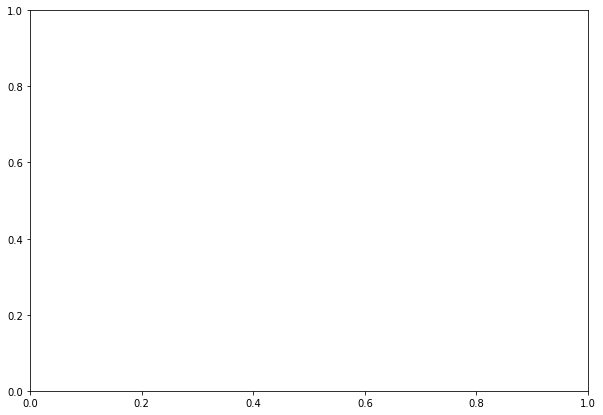

In [ ]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_preds)